In [556]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#### O que fazer ?

Suponha que tenha recebidos os dados desse dataset crx.csv seu objetivo é criar um modelo preditorio para ele, para saber seu cartão de credito sera aprovado ou não.
Mas antes de gerar um modelo preditivo você deve fazer a limpeza de tal dataset para evitar que seu modelo fique pouco robusto não consiga acertar nas previsões.

In [557]:
df = pd.read_csv('../../data/crx.csv')
df.head()

,b,30.83,0,u,g,w,v,1.25,t,t.1,01,f,g.1,00202,0.1,+
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


Como podemos ver não existem nem nome nas colunas, o que é um problema dado que precisamos limpar os dados.
Então o primeiro passo é dar um nome para cada coluna
Suponha que recebemos um documentação com o nome de cada coluna e o que cada sigla significa e temos que colocar no dataset isso


| Coluna | Descrição                                                              |
|--------|------------------------------------------------------------------------|
| 1      | Gênero (masculino = 'a', feminino = 'b')                               |
| 2      | Idade                                                                  |
| 3      | Débito                                                                 |
| 4      | Estado civil (True/False)                                              |
| 5      | Cliente do banco                                                       |
| 6      | Área de emprego                                                        |
| 7      | Etnia                                                                  |
| 8      | Anos de emprego                                                        |
| 9      | Inadimplência anterior (True/False)                                    |
| 10     | Empregado (True/False)                                                 |
| 11     | Pontuação de crédito                                                   |
| 12     | Possui carteira de motorista (True/False)                              |
| 13     | Cidadania (por nascimento = 'g', outros meios = 's', temporária = 'p') |
| 14     | Código postal                                                          |
| 15     | Renda                                                                  |
| 16     | Aprovado (aprovado = '+', não aprovado = '-')                          |


5: Cliente do banco:
g = Sim
p = Não 
gg = Já foi 

6: Area a qual esta empregado str
Q = Química (Chemistry)
W = Escrita (Writing)
M = Marketing
R = Recursos Humanos (Human Resources)
CC = Consultoria de Computação (Computer Consulting)
K = Contabilidade (Accounting)
C = Ciência da Computação (Computer Science)
D = Design Gráfico (Graphic Design)
X = Xenobiologia (Xenobiology)
I = Ilustração (Illustration)
E = Engenharia (Engineering)
AA = Agricultura de Aquicultura (Aquaculture Agriculture)
FF = Fotografia de Moda (Fashion Photography)
J = Jornalismo (Journalism)

Setima coluna : Etinia str
H = Hmong
V = Viking
BB = Bamar
FF = Fulani
J = Javanese
Z = Zulu
O = Otomi
DD = Druze
N = Navajo


In [558]:
collumns_name = ['sex', 'age', 'debt', 'married', 'bank_customer', 'industry', 'ethnicity', 'years_employed',
                 'prior_default', 'employed', 'credit_score', 'drive_license', 'citizen', 'zip_code', 'income',
                 'approved']
df.columns = collumns_name
df.head()

,sex,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,drive_license,citizen,zip_code,income,approved
0,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,00043,560,+
1,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,00280,824,+
2,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,00100,3,+
3,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,00120,0,+
4,b,32.08,4.000,u,g,m,v,2.50,t,f,0,t,g,00360,0,+


In [559]:
df['sex'] = df['sex'].apply(lambda x: 'Female' if x == 'b' else 'Male')

In [560]:
df['married'] = df['married'].apply(lambda x: 'True' if x == 'y' else 'False')

In [561]:
def change_values(dictionary, value):
    if value in dictionary:
        return dictionary[value]
    else:
        return value

In [562]:
column_industry = {
    'q': 'Chemistry',
    'w': 'Writing',
    'm': 'Marketing',
    'r': 'Human Resources',
    'cc': 'Computer Consulting',
    'k': 'Accounting',
    'c': 'Computer Science',
    'd': 'Graphic Design',
    'x': 'Xenobiology',
    'i': 'Illustration',
    'e': 'Engineering',
    'aa': 'Aquaculture Agriculture',
    'ff': 'Fashion Photography',
    'j': 'Journalism'}

column_bank_client = {
    'g': 'True',
    'p': 'False',
    'gg': 'Former Client'
}

column_etiny = {
    'h': 'Hmong',
    'v': 'Viking',
    'bb': 'Bamar',
    'ff': 'Fulani',
    'j': 'Javanese',
    'z': 'Zulu',
    'o': 'Otomi',
    'dd': 'Druze',
    'n': 'Navajo'
}

column_citizen = {
    'g': 'Citizenship',
    's': 'Other',
    'p': 'temporary'
}

In [563]:
df['industry'] = df['industry'].map(column_industry)

In [564]:
df['ethnicity'] = df['ethnicity'].map(column_etiny)

In [565]:
df['bank_customer'] = df['bank_customer'].map(column_bank_client)

In [566]:
df['citizen'] = df['citizen'].map(column_citizen)

In [567]:
df['prior_default'] = df['prior_default'].apply(lambda x: 'True' if x == 't' else 'False')

In [568]:
df['employed'] = df['employed'].apply(lambda x: 'True' if x == 't' else 'False')

In [569]:
df['approved'] = df['approved'].apply(lambda x: 'True' if x == '+' else 'False')

In [570]:
df['drive_license'] = df['drive_license'].apply(lambda x: 'True' if x == 't' else 'False')

In [571]:
df.head()

,sex,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,drive_license,citizen,zip_code,income,approved
0,Male,58.67,4.460,False,True,Chemistry,Hmong,3.04,True,True,6,False,Citizenship,00043,560,True
1,Male,24.50,0.500,False,True,Chemistry,Hmong,1.50,True,False,0,False,Citizenship,00280,824,True
2,Female,27.83,1.540,False,True,Writing,Viking,3.75,True,True,5,True,Citizenship,00100,3,True
3,Female,20.17,5.625,False,True,Writing,Viking,1.71,True,False,0,False,Other,00120,0,True
4,Female,32.08,4.000,False,True,Marketing,Viking,2.50,True,False,0,True,Citizenship,00360,0,True


Pronto resolvemos um problema, mas agora ainda temos que ver o que fazer com os valores NAN  e ? 
Podemos simplimente dropalos , mas tambem é possivel puxar outras abordagens como completar com a média ou algo do tipo

In [572]:
#Nessa celula resolveremos o prolbema de dados como ? e trocaremos eles por nan 
df.replace(to_replace='?', value=np.nan, inplace=True)

In [573]:
for column in df.columns:
    print('----------------------------------------------')
    print(f'Valores unicos {column} - {df[column].value_counts()}')
    print(f'Valores faltantes {column} - {df[column].isnull().sum()}')

----------------------------------------------
Valores unicos sex - sex
Female    467
Male      222
Name: count, dtype: int64
Valores faltantes sex - 0
----------------------------------------------
Valores unicos age - age
22.67    9
20.42    7
23.58    6
24.50    6
25.00    6
        ..
28.33    1
18.75    1
18.50    1
40.25    1
36.42    1
Name: count, Length: 348, dtype: int64
Valores faltantes age - 12
----------------------------------------------
Valores unicos debt - debt
1.500     21
3.000     19
2.500     19
0.000     18
0.750     16
          ..
0.085      1
12.250     1
11.045     1
11.125     1
3.375      1
Name: count, Length: 215, dtype: int64
Valores faltantes debt - 0
----------------------------------------------
Valores unicos married - married
False    526
True     163
Name: count, dtype: int64
Valores faltantes married - 0
----------------------------------------------
Valores unicos bank_customer - bank_customer
True             518
False            163
Former Cli

### O que fazer ocom os valores nulos ? 
O que podemos fazer nesse caso é o mais simples usar um  ```df.dropna()```
Ou podemos imputar valores algumas tecnicas mais simples são a imputação da mediana, tendecia central e para valores categoricos podem ser os valores mais repitidos
Existem outras tecnicas mais avançadas como inputação por regressão e imputação múltipla
Nesse notebook optarei pela exclusão mas criarei outros notebooks para testar as tecnicas citadas acima para ver a diferença de cada uma e como isso impactara no modelo preditivo

In [574]:
df.dropna(inplace=True)

In [575]:
df.head()

,sex,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,drive_license,citizen,zip_code,income,approved
0,Male,58.67,4.460,False,True,Chemistry,Hmong,3.04,True,True,6,False,Citizenship,00043,560,True
1,Male,24.50,0.500,False,True,Chemistry,Hmong,1.50,True,False,0,False,Citizenship,00280,824,True
2,Female,27.83,1.540,False,True,Writing,Viking,3.75,True,True,5,True,Citizenship,00100,3,True
3,Female,20.17,5.625,False,True,Writing,Viking,1.71,True,False,0,False,Other,00120,0,True
4,Female,32.08,4.000,False,True,Marketing,Viking,2.50,True,False,0,True,Citizenship,00360,0,True


## EDA

In [576]:
df.describe()

,debt,years_employed,credit_score,income
count,662.000000,662.000000,662.000000,662.000000
mean,4.812024,2.232915,2.472810,1004.102719
std,5.014809,3.354702,4.941566,5218.195059
min,0.000000,0.000000,0.000000,0.000000
25%,1.010000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.437500,2.615000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


In [577]:
for column in df.columns:
    if df[column].dtype != 'object':
        print(f'Standard deviation of {column} is {np.std(df[column])} , mean is {df[column].mean()}')

Standard deviation of debt is 5.011019855917023 , mean is 4.812024169184289
Standard deviation of years_employed is 3.3521677216290633 , mean is 2.232915407854985
Standard deviation of credit_score is 4.937832641901039 , mean is 2.472809667673716
Standard deviation of income is 5214.2523346486 , mean is 1004.1027190332326


In [578]:
fig = px.box(df, x='approved', y='debt', title='Debito e aprovação')
fig.show()

In [579]:
fig = px.box(df, x='approved', y='years_employed', title='Anos empregado e aprovação')
fig.show()

In [580]:
fig = px.box(df, x='approved', y='credit_score', title='Anos empregado e aprovação')
fig.show()

In [581]:
fig = px.box(df, x='approved', y='income', title='Anos empregado e aprovação')
fig.show()

In [582]:
fig1 = px.box(df, x='approved', y='debt', title='Debito e aprovação')
fig2 = px.box(df, x='approved', y='years_employed', title='Anos empregado e aprovação')
fig3 = px.box(df, x='approved', y='credit_score', title='Pontuação de crédito e aprovação')
fig4 = px.box(df, x='approved', y='income', title='Renda e aprovação')

fig_combined = make_subplots(rows=2, cols=2, subplot_titles=(
    'Debito e aprovação', 'Anos empregado e aprovação', 'Pontuação de crédito e aprovação', 'Renda e aprovação'))

# Adicionar os gráficos à figura combinada
fig_combined.add_trace(fig1.data[0], row=1, col=1)
fig_combined.add_trace(fig2.data[0], row=1, col=2)
fig_combined.add_trace(fig3.data[0], row=2, col=1)
fig_combined.add_trace(fig4.data[0], row=2, col=2)

fig_combined.update_layout(height=800, width=1000, title_text="Box plots")
fig_combined.show()


Podemos ver que o dataset tem muitos outliers teremos que tratalos
vamos ver agora a sua kurtoises e assimetria

In [583]:
fig = px.histogram(df, x="debt", hover_data=df.columns,
                   title=f'Histograma debito , assimetria {df["debt"].skew()}, kurtoises {df["years_employed"].kurt()}')

fig.show()

In [584]:
fig = px.histogram(df, x="years_employed", hover_data=df.columns,
                   title=f'Histograma anos empregado , assimetria {df["years_employed"].skew()}, kurtoises {df["years_employed"].kurt()}')
fig.show()

In [585]:
fig = px.histogram(df, x="credit_score", hover_data=df.columns,
                   title=f'Histograma valores de credito , assimetria {df["credit_score"].skew()} ,kurtoises {df["credit_score"].kurt()}')
fig.show()

In [586]:
fig = px.histogram(df, x="income", hover_data=df.columns,
                   title=f'Histograma salario , assimetria {df["years_employed"].skew()} ,kurtoises {df["years_employed"].kurt()}')

fig.show()

In [587]:
fig = px.scatter(df, x="debt", y="years_employed", color="approved")
fig.show()

In [588]:
fig = px.scatter(df, x="years_employed", y="income", color="approved")
fig.show()

In [589]:
fig = px.scatter(df, x="years_employed", y="credit_score", color="approved")
fig.show()

In [590]:
fig = px.scatter(df, x="credit_score", y="income", color="approved")
fig.show()

In [591]:
fig = px.scatter(df, x="debt", y="income", color="approved")
fig.show()

## IQR

In [592]:
for column in df.columns:
    if df[column].dtype != 'object':
        Q1 = np.percentile(df[column], 25)
        Q3 = np.percentile(df[column], 75)
        print(f'IQR {column} is: {Q3 - Q1}')

IQR debt is: 6.4275
IQR years_employed is: 2.45
IQR credit_score is: 3.0
IQR income is: 400.0


In [593]:
df.describe()

,debt,years_employed,credit_score,income
count,662.000000,662.000000,662.000000,662.000000
mean,4.812024,2.232915,2.472810,1004.102719
std,5.014809,3.354702,4.941566,5218.195059
min,0.000000,0.000000,0.000000,0.000000
25%,1.010000,0.165000,0.000000,0.000000
50%,2.750000,1.000000,0.000000,5.000000
75%,7.437500,2.615000,3.000000,400.000000
max,28.000000,28.500000,67.000000,100000.000000


Vemos que a distribuição é assimetrica e tem um kutosis extrema em todas as colunas, existem muito outliers, como podemos ver nos boxplots e no describe 

### Remoção dos outiliers
Criarei uma função que com alguns metodos de remoção de outliers 
1) Remover pelo desvio padrão
2) Por quartis

In [594]:
def remove_out(dataframe, column, method):
    if method == 'IQR':
        dataframe = iqr_remove_out(dataframe, column)
    else:
        raise Exception(f'method {method} not implemented')
    return dataframe


def simple_remove_out(dataframe, column, values):
    if dataframe[column].dtype != 'object':
        dataframe = dataframe[(dataframe[column] < values.get('max')) & (dataframe[column] < values.get(min))]
        return dataframe
    else:
        Exception('Column not int or float !')


def iqr_remove_out(dataframe, column):
    if dataframe[column].dtype != 'object':
        q1 = dataframe[column].quantile(0.25)
        q3 = dataframe[column].quantile(0.75)
        iqr = q1 - q3
        dataframe = dataframe[(dataframe[column] < (q1 - 1.5 * iqr)) & (dataframe[column] > (q3 + 1.5 * iqr))]
        return dataframe
    else:
        Exception('Column not int or float !')

In [595]:
df_filtred_iqr_income = remove_out(df, 'income', 'IQR')

In [596]:
fig1 = px.box(df_filtred_iqr_income, x='approved', y='debt', title='Debito e aprovação')
fig2 = px.box(df_filtred_iqr_income, x='approved', y='years_employed', title='Anos empregado e aprovação')
fig3 = px.box(df_filtred_iqr_income, x='approved', y='credit_score', title='Pontuação de crédito e aprovação')
fig4 = px.box(df_filtred_iqr_income, x='approved', y='income', title='Renda e aprovação')

fig_combined = make_subplots(rows=2, cols=2, subplot_titles=(
    'Debito e aprovação', 'Anos empregado e aprovação', 'Pontuação de crédito e aprovação', 'Renda e aprovação'))

# Adicionar os gráficos à figura combinada
fig_combined.add_trace(fig1.data[0], row=1, col=1)
fig_combined.add_trace(fig2.data[0], row=1, col=2)
fig_combined.add_trace(fig3.data[0], row=2, col=1)
fig_combined.add_trace(fig4.data[0], row=2, col=2)

fig_combined.update_layout(height=800, width=1000, title_text="Dados com os outliers de salario removidos usando IQR")
fig_combined.show()


In [597]:
credit_score_std = df['credit_score'].std()
df_filtred_per_std_score = df[df['credit_score'] < credit_score_std * 3]

In [598]:
fig1 = px.box(df_filtred_per_std_score, x='approved', y='debt', title='Debito e aprovação')
fig2 = px.box(df_filtred_per_std_score, x='approved', y='years_employed', title='Anos empregado e aprovação')
fig3 = px.box(df_filtred_per_std_score, x='approved', y='credit_score', title='Pontuação de crédito e aprovação')
fig4 = px.box(df_filtred_per_std_score, x='approved', y='income', title='Renda e aprovação')

fig_combined = make_subplots(rows=2, cols=2, subplot_titles=(
    'Debito e aprovação', 'Anos empregado e aprovação', 'Pontuação de crédito e aprovação', 'Renda e aprovação'))

# Adicionar os gráficos à figura combinada
fig_combined.add_trace(fig1.data[0], row=1, col=1)
fig_combined.add_trace(fig2.data[0], row=1, col=2)
fig_combined.add_trace(fig3.data[0], row=2, col=1)
fig_combined.add_trace(fig4.data[0], row=2, col=2)

fig_combined.update_layout(height=800, width=1000,
                           title_text="Dados com os outliers da pontuação de creidito removidos")
fig_combined.show()


In [599]:
income_std = df['income'].std()
df_filtred_per_std_income = df[df['income'] < income_std * 2]

In [600]:
fig1 = px.box(df_filtred_per_std_income, x='approved', y='debt', title='Debito e aprovação')
fig2 = px.box(df_filtred_per_std_income, x='approved', y='years_employed', title='Anos empregado e aprovação')
fig3 = px.box(df_filtred_per_std_income, x='approved', y='credit_score', title='Pontuação de crédito e aprovação')
fig4 = px.box(df_filtred_per_std_income, x='approved', y='income', title='Renda e aprovação')

fig_combined = make_subplots(rows=2, cols=2, subplot_titles=(
    'Debito e aprovação', 'Anos empregado e aprovação', 'Pontuação de crédito e aprovação', 'Renda e aprovação'))

# Adicionar os gráficos à figura combinada
fig_combined.add_trace(fig1.data[0], row=1, col=1)
fig_combined.add_trace(fig2.data[0], row=1, col=2)
fig_combined.add_trace(fig3.data[0], row=2, col=1)
fig_combined.add_trace(fig4.data[0], row=2, col=2)

fig_combined.update_layout(height=800, width=1000,
                           title_text="Dados com os outliers de salario removidos pelo disvio padrão")
fig_combined.show()


Podemos ver que em cada uma das três abordagens tivemos resultados diferentes
Na primeira usando uma abordagem de IQR, tivemos uma boa retirada dos outliers, mas em contra partida os outlies continuam mesmo apos a remoção de parte deles
Na segunda ulizando um a abordagem com base no desvio padrão, conseguimos remover bem os outliers extremos.
Na terceira utilizando a mesma abordagem de desvio padrão, tivemos a retirada de boa parte dos outiliers, mas igual no outro foram criados mais outliers, mas nessa abordagem temos uma boa margem de cobertura de casos.

### Seleção de features 
Irei mostar algumas tecnicas para selecionar as features

In [601]:
df.head()

,sex,age,debt,married,bank_customer,industry,ethnicity,years_employed,prior_default,employed,credit_score,drive_license,citizen,zip_code,income,approved
0,Male,58.67,4.460,False,True,Chemistry,Hmong,3.04,True,True,6,False,Citizenship,00043,560,True
1,Male,24.50,0.500,False,True,Chemistry,Hmong,1.50,True,False,0,False,Citizenship,00280,824,True
2,Female,27.83,1.540,False,True,Writing,Viking,3.75,True,True,5,True,Citizenship,00100,3,True
3,Female,20.17,5.625,False,True,Writing,Viking,1.71,True,False,0,False,Other,00120,0,True
4,Female,32.08,4.000,False,True,Marketing,Viking,2.50,True,False,0,True,Citizenship,00360,0,True


Ainda não sabemos como tratar strings, isso sera mostrado mais para a frente então vamos dropalas por enquanto
Somente no target que irei mudar true por 1 e false para 0 

In [602]:
df_feature_select = df.drop(
    columns=['sex', 'married', 'bank_customer', 'industry', 'ethnicity', 'prior_default', 'employed', 'drive_license',
             'citizen'])
df_feature_select_iqr_income = df_filtred_iqr_income.drop(
    columns=['sex', 'married', 'bank_customer', 'industry', 'ethnicity', 'prior_default', 'employed', 'drive_license',
             'citizen'])
df_feature_select_per_std_score = df_filtred_per_std_score.drop(
    columns=['sex', 'married', 'bank_customer', 'industry', 'ethnicity', 'prior_default', 'employed', 'drive_license',
             'citizen'])
df_feature_select_per_std_income = df_filtred_per_std_income.drop(
    columns=['sex', 'married', 'bank_customer', 'industry', 'ethnicity', 'prior_default', 'employed', 'drive_license',
             'citizen'])

In [603]:
df_feature_select['approved'] = df['approved'].apply(lambda x: 1 if x == 'True' else 0)
df_feature_select_iqr_income['approved'] = df_feature_select_iqr_income['approved'].apply(
    lambda x: 1 if x == 'True' else 0)
df_feature_select_per_std_score['approved'] = df_feature_select_per_std_score['approved'].apply(
    lambda x: 1 if x == 'True' else 0)
df_feature_select_per_std_income['approved'] = df_feature_select_per_std_income['approved'].apply(
    lambda x: 1 if x == 'True' else 0)
df_feature_select.head()

,age,debt,years_employed,credit_score,zip_code,income,approved
0,58.67,4.460,3.04,6,00043,560,1
1,24.50,0.500,1.50,0,00280,824,1
2,27.83,1.540,3.75,5,00100,3,1
3,20.17,5.625,1.71,0,00120,0,1
4,32.08,4.000,2.50,0,00360,0,1


In [604]:
df_feature_select.corr()

,age,debt,years_employed,credit_score,zip_code,income,approved
age,1.000000,0.213973,0.414331,0.196958,-0.074472,0.028803,0.172319
debt,0.213973,1.000000,0.303271,0.271153,-0.218021,0.119618,0.214548
years_employed,0.414331,0.303271,1.000000,0.328283,-0.070684,0.052503,0.334450
credit_score,0.196958,0.271153,0.328283,1.000000,-0.119577,0.059176,0.407127
zip_code,-0.074472,-0.218021,-0.070684,-0.119577,1.000000,0.069085,-0.095596
income,0.028803,0.119618,0.052503,0.059176,0.069085,1.000000,0.173004
approved,0.172319,0.214548,0.334450,0.407127,-0.095596,0.173004,1.000000


<Axes: >

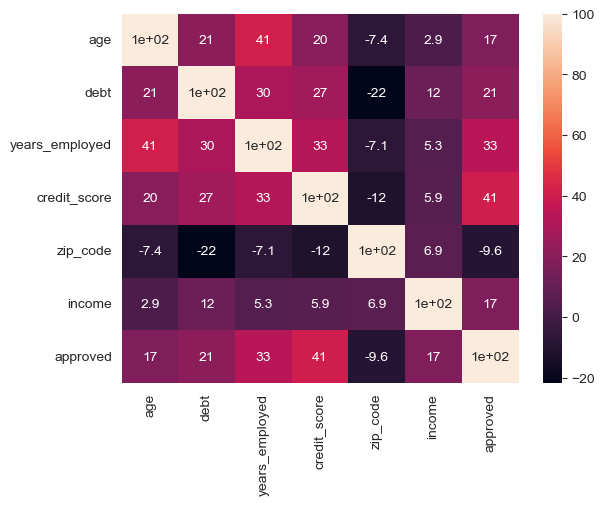

In [605]:
sns.heatmap(df_feature_select.corr() * 100, annot=True)

Dado os resultados acima vamos retirar todas as colunas com menos de 0.3 de corr, neste caso não temos colunas alto correlacionadas mas caso isso ocorra sempre retirar colunas com mais de 0.8 ou 80% de correlação 

In [606]:
df_feature_select = df_feature_select.drop(columns=['age','debt','zip_code','income'])

Utilizando o dataframe "Sujo" podemos ver que as melhores features são years_employed e debit_score

Text(0.5, 1.0, 'Correlação dos dados sem outliers utilizando o metodo iqr na coluna income')

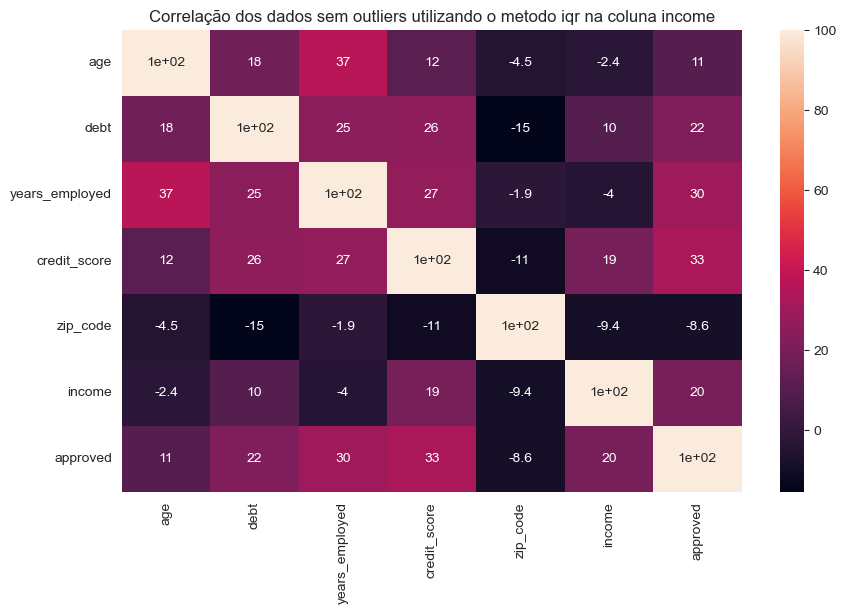

In [607]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_feature_select_iqr_income.corr() * 100, annot=True, )
plt.title("Correlação dos dados sem outliers utilizando o metodo iqr na coluna income")

In [608]:
df_feature_select_iqr_income = df_feature_select_iqr_income.drop(columns=['age','debt','zip_code','income'])

Text(0.5, 1.0, 'Correlação dos dados sem outliers utilizando o metodo std na coluna credit score')

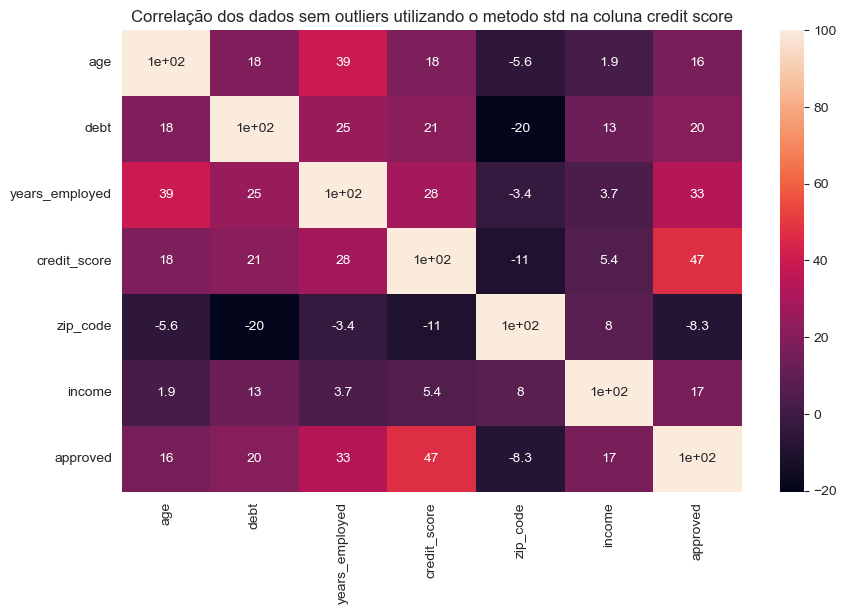

In [609]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_feature_select_per_std_score.corr() * 100, annot=True)
plt.title("Correlação dos dados sem outliers utilizando o metodo std na coluna credit score")

In [610]:
df_feature_select_per_std_score = df_feature_select_per_std_score.drop(columns=['age','debt','zip_code','income'])

Text(0.5, 1.0, 'Correlação dos dados sem outliers utilizando o metodo std na coluna income')

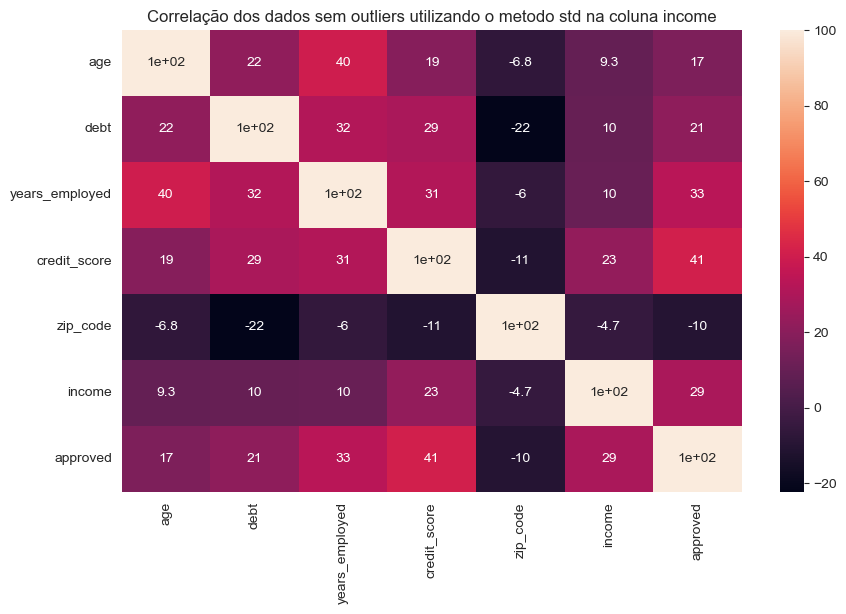

In [611]:
plt.figure(figsize=(10, 6))
sns.heatmap(df_feature_select_per_std_income.corr() * 100, annot=True)
plt.title("Correlação dos dados sem outliers utilizando o metodo std na coluna income")

In [612]:
df_feature_select_per_std_income = df_feature_select_per_std_income.drop(columns=['age','debt','zip_code','income'])

Como podemos ver as duas melhores continuam sendo o years_employed e debit score, mas conseguimos aumentar a correlação delas com o target 
#### Utilizando o PCA 
Irei utilizar somente o melhor dataset , o que aprensetou a melhor correlação para gerar o PCA

In [613]:
X = df_feature_select_per_std_score.drop(columns='approved')
y = df_feature_select_per_std_score['approved']

In [614]:
pca = PCA(n_components=2, whiten=True)
pca.fit(X)

PCA(n_components=2, whiten=True)

In [615]:
print(pca.explained_variance_)

[13.70589648  7.33108441]


In [616]:
print(pca.explained_variance_ratio_)

[0.65151442 0.34848558]


In [617]:
print(pca.singular_values_)

[94.09574448 68.8177341 ]


In [618]:
pca_data = pca.transform(X)

In [619]:
pca_data = pd.DataFrame(pca_data)
pca_data['target'] = df_feature_select_per_std_score['approved']
coluns_name = {0: 'PCA1', 1: 'PCA2'}
pca_data.rename(columns=coluns_name, inplace=True)
pca_data

,PCA1,PCA2,target
0,1.027489,-0.552793,1.0
1,-0.543008,0.236448,1.0
2,0.913917,-0.127290,1.0
3,-0.510818,0.300309,1.0
4,-0.389721,0.540548,1.0
...,...,...,...
642,-0.581330,0.160423,0.0
643,-0.021553,-0.030687,0.0
644,-0.243959,0.178906,0.0
645,-0.766807,-0.207537,0.0


In [620]:
px.scatter(pca_data, x='PCA1', y='PCA2', color='target')

In [621]:
pca_data.corr() * 100

,PCA1,PCA2,target
PCA1,1.000000e+02,-3.251613e-14,30.357702
PCA2,-3.251613e-14,1.000000e+02,4.268490
target,3.035770e+01,4.268490e+00,100.000000


PCA se mostrou com um comportamento bem estranho
### Seleção por variancia

In [622]:
selector = VarianceThreshold(threshold=0.2)
X_selected = selector.fit_transform(X)
X_selected

array([[3.04, 6.  ],
       [1.5 , 0.  ],
       [3.75, 5.  ],
       ...,
       [2.  , 1.  ],
       [0.04, 0.  ],
       [8.29, 0.  ]])

Podemos ver que por variancia são retornada todas as features, dentre alguns dos testes realizados o que se mostrou melhor foi o por correlação , dentre os metodos menos robustos
### Criação de um modelo e comparação 
Irei criar um modelo simples de classificação para mostrar o impacto da limpeza nos dados 

In [623]:
df_feature_select

,years_employed,credit_score,approved
0,3.04,6,1
1,1.50,0,1
2,3.75,5,1
3,1.71,0,1
4,2.50,0,1
...,...,...,...
684,1.25,0,0
685,2.00,2,0
686,2.00,1,0
687,0.04,0,0


In [624]:
X_trash_data = df_feature_select.drop(columns='approved')
y_trash_data = df_feature_select[['approved']]
X_trash_data_train, X_trash_data_test, y_trash_data_train, y_trash_data_test = train_test_split(X_trash_data,
                                                                                                y_trash_data,
                                                                                                test_size=0.3)
dt_trash = DecisionTreeClassifier()
dt_trash = dt_trash.fit(X_trash_data_train, y_trash_data_train)

y_pred_trash = dt_trash.predict(X_trash_data_test)

accuracy = accuracy_score(y_trash_data_test, y_pred_trash)

print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_trash_data_test, y_pred_trash))

conf_matrix = confusion_matrix(y_trash_data_test, y_pred_trash)
print("Matriz de confusão:")
print(conf_matrix)

Acurácia: 0.7437185929648241
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78       106
           1       0.80      0.60      0.69        93

    accuracy                           0.74       199
   macro avg       0.76      0.74      0.74       199
weighted avg       0.75      0.74      0.74       199

Matriz de confusão:
[[92 14]
 [37 56]]


In [625]:
X_iqr_filter_data = df_feature_select_iqr_income.drop(columns='approved')
y_iqr_filter_data = df_feature_select_iqr_income[['approved']]
X_iqr_filter_data_train, X_iqr_filter_data_test, y_iqr_filter_data_train, y_iqr_filter_data_test = train_test_split(
    X_iqr_filter_data, y_iqr_filter_data, test_size=0.3)
dt_iqr = DecisionTreeClassifier()
dt_iqr = dt_iqr.fit(X_iqr_filter_data_train, y_iqr_filter_data_train)

y_pred_iqr = dt_iqr.predict(X_iqr_filter_data_test)

accuracy = accuracy_score(y_iqr_filter_data_test, y_pred_iqr)

print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_iqr_filter_data_test, y_pred_iqr))

conf_matrix = confusion_matrix(y_iqr_filter_data_test, y_pred_iqr)
print("Matriz de confusão:")
print(conf_matrix)


Acurácia: 0.7861635220125787
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       102
           1       0.77      0.58      0.66        57

    accuracy                           0.79       159
   macro avg       0.78      0.74      0.75       159
weighted avg       0.78      0.79      0.78       159

Matriz de confusão:
[[92 10]
 [24 33]]


In [626]:
X_feature_select_per_std_score = df_feature_select_per_std_score.drop(columns='approved')
y_feature_select_per_std_score = df_feature_select_per_std_score[['approved']]
X_feature_select_per_std_score_train, X_feature_select_per_std_score_test, y_feature_select_per_std_score_train, y_feature_select_per_std_score_test = train_test_split(
    X_feature_select_per_std_score, y_feature_select_per_std_score, test_size=0.3)
dt_std_score = DecisionTreeClassifier()
dt_std_score = dt_std_score.fit(X_feature_select_per_std_score_train, y_feature_select_per_std_score_train)


y_pred_std_score = dt_iqr.predict(X_feature_select_per_std_score_test)

accuracy = accuracy_score(y_feature_select_per_std_score_test, y_pred_std_score)

print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_feature_select_per_std_score_test, y_pred_std_score))

conf_matrix = confusion_matrix(y_feature_select_per_std_score_test, y_pred_std_score)
print("Matriz de confusão:")
print(conf_matrix)


Acurácia: 0.7846153846153846
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.73      0.96      0.83       105
           1       0.93      0.58      0.71        90

    accuracy                           0.78       195
   macro avg       0.83      0.77      0.77       195
weighted avg       0.82      0.78      0.77       195

Matriz de confusão:
[[101   4]
 [ 38  52]]


In [627]:
X_feature_select_per_std_income = df_feature_select_per_std_income.drop(columns='approved')
y_feature_select_per_std_income = df_feature_select_per_std_income[['approved']]
X_feature_select_per_std_income_train, X_feature_select_per_std_income_test, y_feature_select_per_std_income_train, y_feature_select_per_std_income_test = train_test_split(
    X_feature_select_per_std_income, y_feature_select_per_std_income, test_size=0.3)
dt_std_income = DecisionTreeClassifier()
dt_std_income = dt_std_income.fit(X_iqr_filter_data_train, y_iqr_filter_data_train)

y_pred_std_income = dt_iqr.predict(X_feature_select_per_std_income_test)

accuracy = accuracy_score(y_feature_select_per_std_income_test, y_pred_std_income)

print("Acurácia:", accuracy)
print("Relatório de classificação:")
print(classification_report(y_feature_select_per_std_income_test, y_pred_std_income))

conf_matrix = confusion_matrix(y_feature_select_per_std_income_test, y_pred_std_income)
print("Matriz de confusão:")
print(conf_matrix)

Acurácia: 0.8622448979591837
Relatório de classificação:
              precision    recall  f1-score   support

           0       0.82      0.95      0.88       102
           1       0.94      0.77      0.84        94

    accuracy                           0.86       196
   macro avg       0.88      0.86      0.86       196
weighted avg       0.87      0.86      0.86       196

Matriz de confusão:
[[97  5]
 [22 72]]


#### Resultado final 
Podemos ver que o melhor dataset no final foi o dataset que tem a maior correlação com o target ( O que os outliers foram tirados pelo desvio padrão da pontuação de credito)
Podemos ver isso pela acuracia recall e f1-score
